## AIS Data explore

In [ ]:
import pandas as pd
import numpy as np
import movingpandas as mdp

/usr/local/python/3.12.1/lib/python3.12/site-packages/movingpandas/__init__.py:37: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


In [ ]:
raw = pd.read_csv('../raw_data/1.csv')
raw = raw.rename(columns={'对地航速（sog）': 'SOG', '航迹向（hdg）': 'heading', '前一个航迹向（pre_hdg）': 'preheading'})
raw.head(10)

,postime,time_diff,lon,lat,distance,SOG,heading,preheading,draught,pre_draught,status,pre_status,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,装载状态
0,2020-12-31 16:01:40+00:00,720,101.28917,2.925650,0.0,0.0,30.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2020-12-31 16:04:40+00:00,180,101.28918,2.925655,0.0,0.0,30.0,30.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2020-12-31 16:16:40+00:00,720,101.28916,2.925652,0.0,0.0,29.0,30.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-12-31 16:19:40+00:00,180,101.28916,2.925655,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-12-31 16:28:40+00:00,540,101.28914,2.925659,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-12-31 16:40:52+00:00,732,101.28916,2.925633,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-12-31 16:46:40+00:00,348,101.28918,2.925643,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-12-31 16:58:40+00:00,720,101.28916,2.925640,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,2020-12-31 17:03:40+00:00,300,101.28916,2.925650,0.0,0.0,29.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,2020-12-31 17:16:40+00:00,780,101.28916,2.925615,0.0,0.0,30.0,29.0,13.9,13.9,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: >

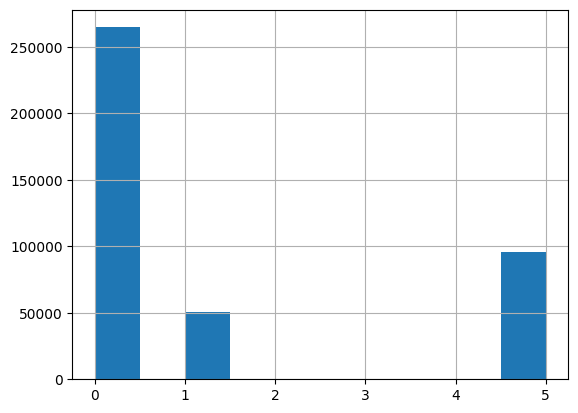

In [ ]:
# 经检查，状态0是航行状态，状态1速度较低，状态5速度基本上都是0 (锚泊状态)
# 训练数据以状态0和1为主
raw.status.hist()

### AIS 数据处理

In [ ]:
# 将航行状态0和1数据全部提取
df = raw[(raw['status']==0) | (raw['status']==1)]

# 删除没有用的列
df = df.drop(['time_diff', 'lon', 'lat', 'distance', 'pre_status', '装载状态', 'pre_draught', 'preheading'], axis=1)

# 删除存在空值的行
df = df.dropna(axis=0)

# 时间转换成datetime对象
df['postime'] = pd.to_datetime(df['postime'],format='ISO8601')

# 日期索引测试
df[(df['postime'].dt.year ==2021) & (df['postime'].dt.month ==1) & (df['postime'].dt.day ==6)].head()

,postime,SOG,heading,draught,status,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction
680,2021-01-06 00:07:48+00:00,12.7,32.0,13.3,0,11.23,45.0,2.89,49.0,0.25,218.0
681,2021-01-06 00:37:56+00:00,13.0,39.0,13.3,0,11.02,46.0,2.85,51.0,0.25,228.0
682,2021-01-06 00:54:50+00:00,13.0,35.0,13.3,0,11.07,45.0,2.89,49.0,0.31,218.0
683,2021-01-06 01:08:15+00:00,13.4,10.0,13.3,0,11.07,45.0,2.89,49.0,0.31,218.0
684,2021-01-06 01:38:19+00:00,15.3,11.0,13.3,0,10.80,47.0,2.87,50.0,0.44,234.0


## 油耗数据探索

In [ ]:
df_fuel = pd.read_csv('../raw_data/mrv.csv')

# 时间转换成datetime对象
df_fuel['input_date'] = pd.to_datetime(df_fuel['input_date'],format='ISO8601')

df_fuel.head()

,input_date,daily_dist_mrv,daily_voyage_time_mrv,daily_speed_mrv,daily_fuel_mrv,num
0,2021-01-02 04:00:00+00:00,169.0,13.0,13.00,41.39,1
1,2021-01-03 04:00:00+00:00,128.0,9.4,13.62,34.59,1
2,2021-01-04 04:00:00+00:00,335.0,24.0,13.96,71.40,1
3,2021-01-05 04:00:00+00:00,311.0,24.0,12.96,71.83,1
4,2021-01-06 04:00:00+00:00,335.0,24.0,13.96,70.86,1


In [ ]:
# 先观察第一艘船
df_fuel = df_fuel[df_fuel['num'] == 1]

# 筛选出一直在跑的船，这边考虑daily_voyage_time_mrv大于等于24小时的轨迹
df_fuel = df_fuel[df_fuel['daily_voyage_time_mrv'] >= 24]

# 删除关键字段存在空值的行，daily_fuel_mrv
df_fuel = df_fuel.dropna(axis=0, subset = ['daily_fuel_mrv'])

df_fuel

,input_date,daily_dist_mrv,daily_voyage_time_mrv,daily_speed_mrv,daily_fuel_mrv,num
2,2021-01-04 04:00:00+00:00,335.0,24.0,13.96,71.40,1
3,2021-01-05 04:00:00+00:00,311.0,24.0,12.96,71.83,1
4,2021-01-06 04:00:00+00:00,335.0,24.0,13.96,70.86,1
8,2021-01-10 04:00:00+00:00,287.0,24.0,11.96,53.37,1
9,2021-01-12 04:00:00+00:00,325.0,24.0,13.54,46.84,1
...,...,...,...,...,...,...
1400,2024-11-04 10:00:00+00:00,353.0,24.0,14.71,53.73,1
1415,2024-11-19 11:00:00+00:00,371.0,25.0,14.84,68.15,1
1419,2024-11-23 11:00:00+00:00,415.0,24.0,17.29,97.23,1
1420,2024-11-24 11:00:00+00:00,397.0,24.0,16.54,72.42,1


### 探索数据

<Axes: >

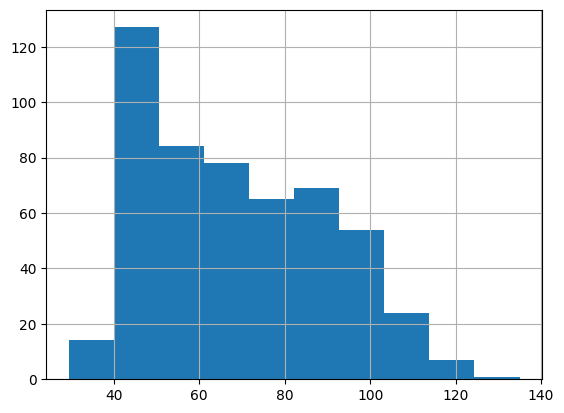

In [ ]:
df_fuel.daily_fuel_mrv.hist()